# Computing power spectra

[![Binder](https://mybinder.org/badge_logo.svg)](https://binder.flatironinstitute.org/v2/user/sgenel/CAMELS_PUBLIC?filepath=/Tutorials/Pk.ipynb)

Example of how to compute a power spectrum from CAMELS data

In [4]:
import numpy as np
import h5py
import hdf5plugin
import MAS_library as MASL
import Pk_library as PKL
import matplotlib.pylab as plt

import readgadget
import sys, os, glob
sys.path.append('/home/jovyan/home/Quijote-Hydro-PNG/')
from utils import *
# import yt

Get the name of the snapshot

In [7]:
snapshot = '/home/jovyan/TNG_L50_1P_fNL/1P_LC_100_50/snapdir_090/snap_090'
ptype    = [1] #[1](CDM), [2](neutrinos) or [1,2](CDM+neutrinos)

In [8]:
# read header
header   = readgadget.header(snapshot)
BoxSize  = header.boxsize/1e3  #Mpc/h
Nall     = header.nall         #Total number of particles
Masses   = header.massarr*1e10 #Masses of the particles in Msun/h
Omega_m  = header.omega_m      #value of Omega_m
Omega_l  = header.omega_l      #value of Omega_l
h        = header.hubble       #value of h
redshift = header.redshift     #redshift of the snapshot
Hubble   = 100.0*np.sqrt(Omega_m*(1.0+redshift)**3+Omega_l)#Value of H(z) in km/s/(Mpc/h)

# read positions, velocities and IDs of the particles
pos = readgadget.read_block(snapshot, "POS ", ptype)/1e3 #positions in Mpc/h
mass = readgadget.read_block(snapshot, "MASS", ptype)*1e10
vel = readgadget.read_block(snapshot, "VEL ", ptype)     #peculiar velocities in km/s
ids = readgadget.read_block(snapshot, "ID  ", ptype)-1   #IDs starting from 0

In [4]:
BoxSize, redshift, h, Masses, Nall, Omega_m, Omega_l

(50.0,
 2.220446049250313e-16,
 0.6711,
 array([       0.        , 64880627.77559537,        0.        ,
        12665939.28677514,        0.        ,        0.        ]),
 array([128035066, 134217728,         0, 134217728,   4846911,      9961]),
 0.3,
 0.7)

In [19]:
pos = pos.astype(np.float32)
grid  = 512
delta = get_delta(pos, grid=grid, BoxSize=BoxSize, W=mass, MAS='CIC', verbose=True)
k, Pk, _, _ = compute_Pk(delta, BoxSize=BoxSize, MAS='CIC', axis=0, verbose=True)


Using CIC mass assignment scheme with weights
Time taken = 7.289 seconds


Computing power spectrum of the field...
Time to complete loop = 7.53
Time taken = 11.64 seconds


/tmp/ipykernel_235/2078514436.py:1: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(2+delta.sum(0)))


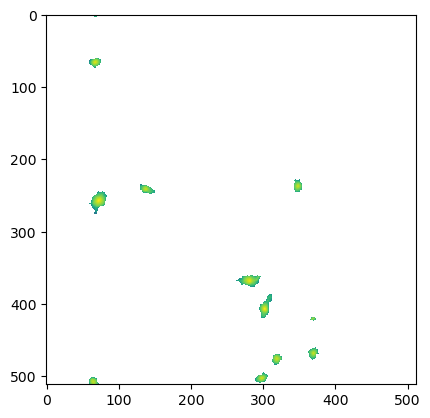

In [26]:
plt.imshow(np.log(2+delta.sum(0)))

In [96]:
f_snap = '/home/jovyan/L501P/1P_LC_100_50/snapdir_090/snap_090.0.hdf5'
ds=yt.load(f_snap)

yt : [INFO     ] 2024-07-12 23:02:52,111 Calculating time from 1.000e+00 to be 4.433e+17 seconds
yt : [INFO     ] 2024-07-12 23:02:52,204 Parameters: current_time              = 4.432875106722329e+17 s
yt : [INFO     ] 2024-07-12 23:02:52,205 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-12 23:02:52,206 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-07-12 23:02:52,207 Parameters: domain_right_edge         = [50000. 50000. 50000.]
yt : [INFO     ] 2024-07-12 23:02:52,208 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2024-07-12 23:02:52,208 Parameters: current_redshift          = 2.220446049250313e-16
yt : [INFO     ] 2024-07-12 23:02:52,209 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-07-12 23:02:52,210 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2024-07-12 23:02:52,210 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2024-07-12 23:02:52,211 Parameters: hubble_constant 

In [1]:
#p = yt.ProjectionPlot(ds, "y", ("gas", "density"))
#p.show()

In [71]:
# slc = yt.SlicePlot(ds, 'x', 'density')
# dens_plot = slc.plots['density']

# fig = dens_plot.figure
# ax = dens_plot.axes
# #colorbar_axes = dens_plot.cax


In [54]:
ptype    = [1] #[1](CDM), [2](neutrinos) or [1,2](CDM+neutrinos)
snapdir = "/snapdir_032/snap_032" #redshift 32:3 90:0
grid=512
for fNL in [ '0', '50', '100', '200', 'n50', 'n100', 'n200']:
    snapshot = "/home/jovyan/L501P/1P_LC_"+fNL+"_50"+snapdir
    k, Pk0, Pk2, Pk4 = compute_Pk_from_snapshot(snapshot, ptype, grid=grid)
    
    np.savez("../Output/1P_LC_all_50/snapdir_032/fNL_"+fNL, k=k, Pk0=Pk0, Pk2=Pk2, Pk4=Pk4)


Using CIC mass assignment scheme with weights
Time taken = 6.622 seconds


Computing power spectrum of the field...
Time to complete loop = 7.10
Time taken = 10.94 seconds

Using CIC mass assignment scheme with weights
Time taken = 6.939 seconds


Computing power spectrum of the field...
Time to complete loop = 7.13
Time taken = 10.99 seconds

Using CIC mass assignment scheme with weights
Time taken = 6.659 seconds


Computing power spectrum of the field...
Time to complete loop = 7.11
Time taken = 10.92 seconds

Using CIC mass assignment scheme with weights
Time taken = 6.639 seconds


Computing power spectrum of the field...
Time to complete loop = 7.06
Time taken = 10.82 seconds

Using CIC mass assignment scheme with weights
Time taken = 6.881 seconds


Computing power spectrum of the field...
Time to complete loop = 7.32
Time taken = 11.31 seconds

Using CIC mass assignment scheme with weights
Time taken = 7.182 seconds


Computing power spectrum of the field...
Time to complete l

Text(0, 0.5, 'P(k)')

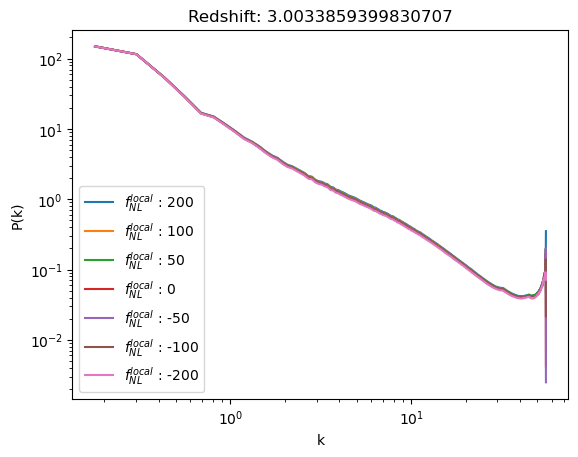

In [58]:
fNL_list=[200, 100, 50, 0, -50, -100, -200]
for i, fNL in enumerate([ '200', '100', '50', '0', 'n50', 'n100', 'n200']):
    k = np.load("../Output/1P_LC_all_50/snapdir_032/fNL_"+fNL+".npz")['k']
    Pk0 = np.load("../Output/1P_LC_all_50/snapdir_032/fNL_"+fNL+".npz")['Pk0']
    plt.loglog(k,Pk0, label="$f_{NL}^{local}$ : "+ "{}".format(fNL_list[i]))
plt.legend()
plt.title("Redshift: 3.0033859399830707")
plt.xlabel("k")
plt.ylabel("P(k)")

Text(0, 0.5, '$\\frac{P_{NG}(k)-P_{G}(k)}{P_{G}(k)}$')

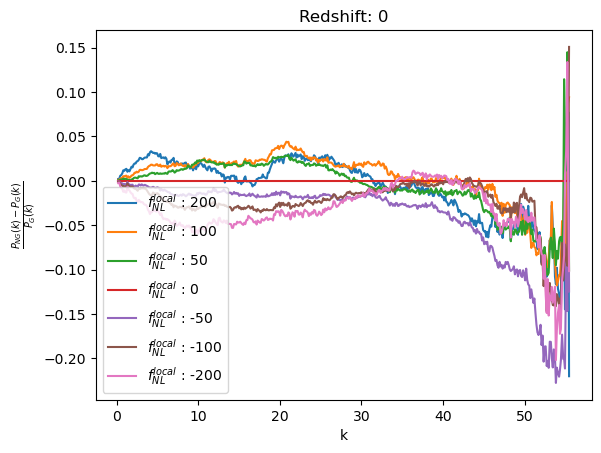

In [83]:
fNL_list=[200, 100, 50, 0, -50, -100, -200]
Pk0_G = np.load("../Output/1P_LC_all_50/snapdir_090/fNL_0.npz")['Pk0']
for i, fNL in enumerate([ '200', '100', '50', '0', 'n50', 'n100', 'n200']):
    k = np.load("../Output/1P_LC_all_50/snapdir_090/fNL_"+fNL+".npz")['k']
    Pk0 = np.load("../Output/1P_LC_all_50/snapdir_090/fNL_"+fNL+".npz")['Pk0']
    plt.plot(k[:-2],((Pk0-Pk0_G)/Pk0_G)[:-2], label="$f_{NL}^{local}$ : "+ "{}".format(fNL_list[i]))
plt.legend()
plt.title("Redshift: 0")
plt.xlabel("k")
plt.ylabel(r"$\frac{P_{NG}(k)-P_{G}(k)}{P_{G}(k)}$")

In [4]:
k, Pk= compute_Pk_from_snapshot(snapshot,ptype)


Using CIC mass assignment scheme with weights
Time taken = 7.380 seconds


Computing power spectrum of the field...
Time to complete loop = 7.36
Time taken = 11.81 seconds


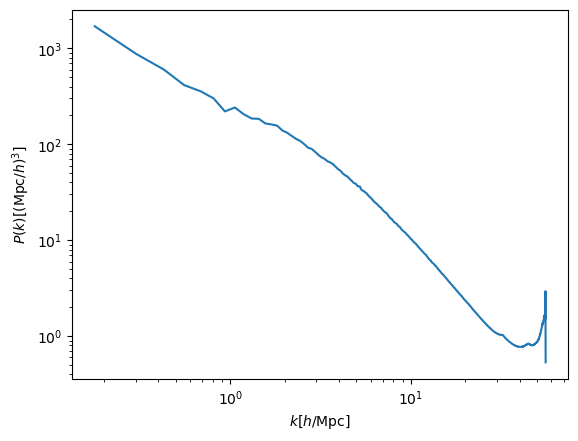

In [11]:
plt.xlabel(r'$k [h/{\rm Mpc}]$')
plt.ylabel(r'$P(k) [({\rm Mpc}/h)^3]$')
plt.xscale('log')
plt.yscale('log')
plt.plot(k, Pk)
plt.show()

In [9]:
# f_snap = '/home/jovyan/TNG_L50_1P_fNL/1P_LC_0_50/groups_000/fof_subhalo_tab_000.0.hdf5'
f_snap = '/home/jovyan/TNG_L50_1P_fNL/1P_LC_100_50/snapdir_090/snap_090.0.hdf5'

Open the snapshot file

In [10]:
data = h5py.File(f_snap, 'r')

Read the snapshot header

In [11]:
BoxSize      = data['Header'].attrs[u'BoxSize']/1e3    #size of the snapshot in comoving Mpc/h
redshift     = data['Header'].attrs[u'Redshift']       #reshift of the snapshot
scale_factor = data['Header'].attrs[u'Time']           #scale factor
h            = data['Header'].attrs[u'HubbleParam']    #value of the hubble parameter in 100 km/s/(Mpc/h)
Masses       = data['Header'].attrs[u'MassTable']*1e10 #masses of the particles in Msun/h
Np           = data['Header'].attrs[u'NumPart_Total']  #total number of particles for specie
Omega_m      = data['Header'].attrs[u'Omega0']         #Omega_matter
Omega_L      = data['Header'].attrs[u'OmegaLambda']    #Omega_Lambda

In [32]:
BoxSize, redshift, h, Masses, Np, Omega_m, Omega_L

(50.0,
 2.220446049250313e-16,
 0.6711,
 array([       0.        , 64880627.77559537,        0.        ,
        12665939.28677514,        0.        ,        0.        ]),
 array([128035066, 134217728,         0, 134217728,   4846911,      9961],
       dtype=uint32),
 0.3,
 0.7)

Read the positions and the masses of the gas particles

In [12]:
pos_gas   = data['PartType0/Coordinates'][:]/1e3 #Mpc/h 
mass_gas  = data['PartType0/Masses'][:]*1e10     #Msun/h

In [16]:
pos_gas = pos_gas.astype(np.float32)
grid  = 512
delta = get_delta(pos_gas, grid=grid, W=True, mass=mass_gas, BoxSize=BoxSize, MAS='CIC', verbose=True)
k, Pk, _, _ = compute_Pk(delta, BoxSize=BoxSize, MAS='CIC', axis=0, verbose=True)


Using CIC mass assignment scheme with weights
Time taken = 0.373 seconds


Computing power spectrum of the field...
Time to complete loop = 7.65
Time taken = 12.61 seconds


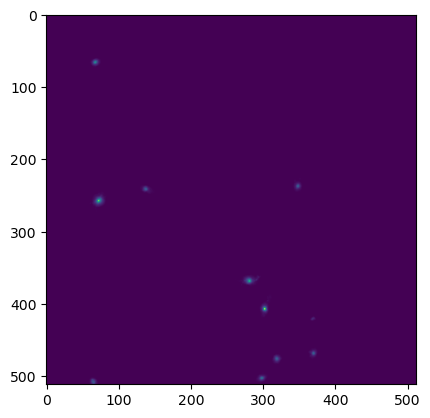

In [17]:
plt.imshow(delta.sum(0))

In [30]:
Masses.sum(), mass.sum()

(77546567.06237051, 8.709301e+25)

In [28]:
mass.shape, mass_gas.shape, pos.shape, pos_gas.shape

((134217728,), (8062644,), (134217728, 3), (8062644, 3))

In [41]:
pos.max(), pos_gas[:,2].max()

(50.0, 37.01354)

Check the masses positions and masses of the gas particles

In [37]:
print('Box size: %.2f Mpc/h'%BoxSize)
print('Snapshot redshift: %.2f'%redshift)
print('%.2f < pos_gas_X < %.2f'%(np.min(pos_gas[:,0]), np.max(pos_gas[:,0])))
print('%.3e < mass_gas  < %.3e'%(np.min(mass_gas), np.max(mass_gas)))

Box size: 50.00 Mpc/h
Snapshot redshift: 0.00
19.61 < pos_gas_X < 47.70
1.745e+06 < mass_gas  < 5.023e+07


Check that the mass in the grid is the same as the mass of all particles

In [21]:
print('Sum of all particle masses:         %.3e Msun/h'%np.sum(mass_gas, dtype=np.float64))
print('Sum of the mass in all grid voxels: %.3e Msun/h'%np.sum(delta, dtype=np.float64))

Sum of all particle masses:         1.073e+14 Msun/h
Sum of the mass in all grid voxels: 1.073e+14 Msun/h


Check that mean is zero, and minimum cant be smaller than -1

In [25]:
print('%.2f < delta < %.2f'%(np.min(delta), np.max(delta)))
print('< delta > = %.2e'%(np.mean(delta, dtype=np.float64)))

-1.00 < delta < 240674.42
< delta > = 5.91e-08


Plot power spectrum

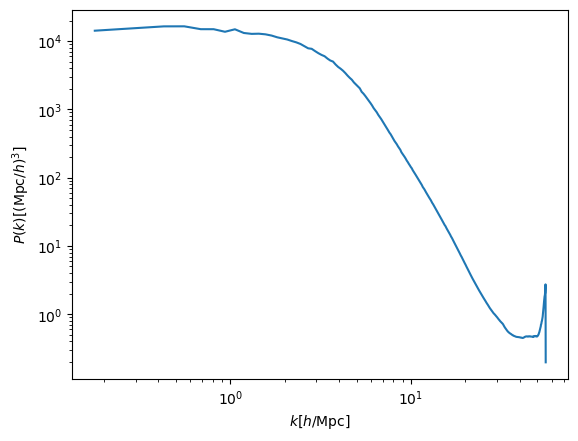

In [27]:
plt.xlabel(r'$k [h/{\rm Mpc}]$')
plt.ylabel(r'$P(k) [({\rm Mpc}/h)^3]$')
plt.xscale('log')
plt.yscale('log')
plt.plot(k, Pk)
plt.show()